## Klasifikasi Iris

In [1]:
# Library
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Supervised Learning
from sklearn.tree import DecisionTreeClassifier

# Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix

### 1. Akuisisi Data

In [2]:
# Pembacaan Dataset
dataset = pd.read_csv("../Dataset/dataset_iris.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2. Eksplorasi Data Analisis

- EDA disesuaikan dengan kebutuhan dan dataset. Sehingga setiap studi kasus yang berbeda, EDAnya juga berbeda.

In [4]:
# Cek Karakteristik Dataset

# Menghitung Jumlah Label


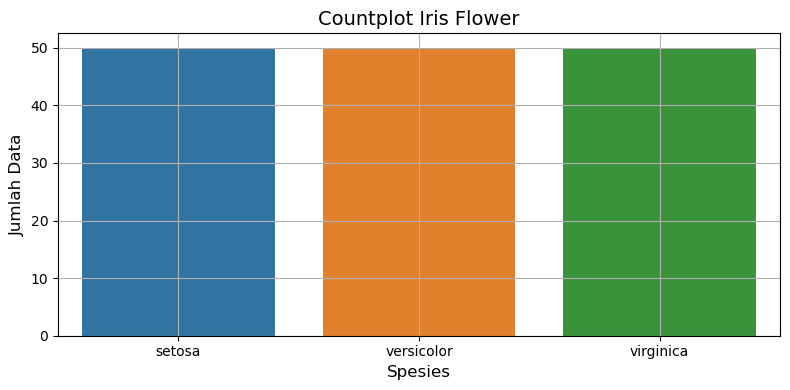

In [5]:
# Barplot - Countplot
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(dataset, x="species", hue="species")

# Set Label
ax.set_title("Countplot Iris Flower", fontsize=14)
ax.set_xlabel("Spesies", fontsize=12)
ax.set_ylabel("Jumlah Data", fontsize=12)
ax.grid(True)

# Show Plot
plt.tight_layout()
plt.show()

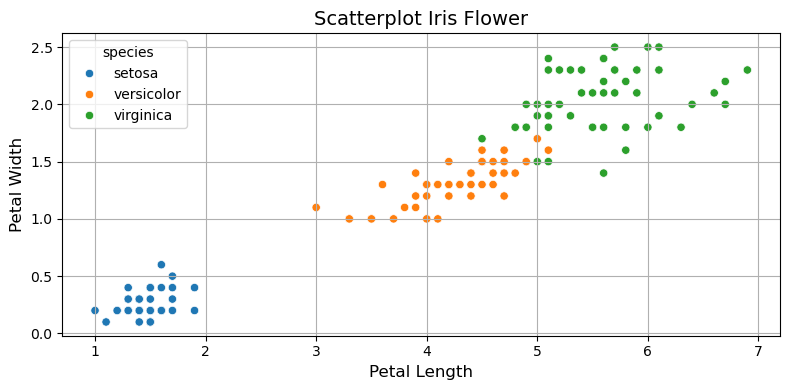

In [6]:
# Barplot - Countplot
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(dataset, x="petal_length", y="petal_width", hue="species")

# Set Label
ax.set_title("Scatterplot Iris Flower", fontsize=14)
ax.set_xlabel("Petal Length", fontsize=12)
ax.set_ylabel("Petal Width", fontsize=12)
ax.grid(True)

# Show Plot
plt.tight_layout()
plt.show()

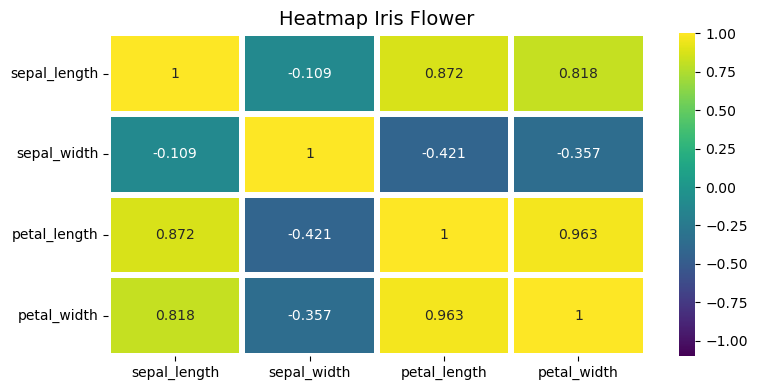

In [7]:
# Barplot - Countplot
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(dataset.corr(method="pearson", numeric_only="True"), vmin=1, vmax=-1, annot=True, fmt='.3g', cmap="viridis", linewidths=3)

# Set Label
ax.set_title("Heatmap Iris Flower", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(False)

# Show Plot
plt.tight_layout()
plt.show()

### 3. Praproses Data

- Praproses data berbeda-beda sesuai dengan kebutuhan dan studi kasusnya.

In [8]:
# Set cFeatures and Labels
x = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = dataset["species"].values

In [9]:
# np.round(x[:5,:],2)
print(x[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
print(y[49:101])

['setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica']


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1) )
scaled = scaler.fit_transform(x)

In [12]:
scaled[:5,:]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

- Bukti bahwa hasil normalisasi akan sama dengan dataset aslinya, hanya saja yang berbeda itu rentang nilainya menjadi 0 sampai 1.

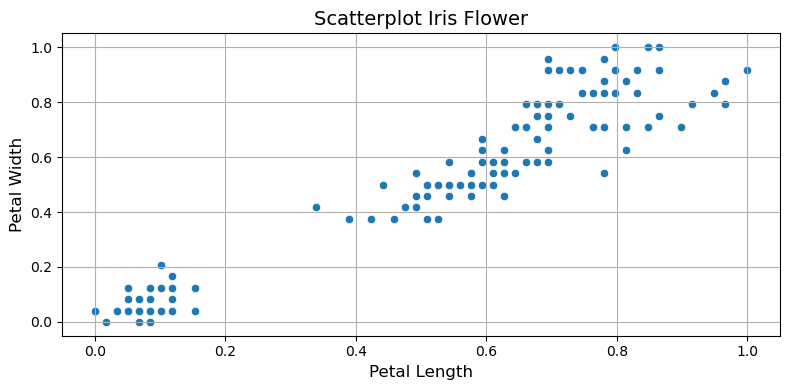

In [13]:
# Barplot - Countplot
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x=np.array(scaled[:,2:3].reshape(-1)), y=np.array(scaled[:,3:4].reshape(-1)))

# Set Label
ax.set_title("Scatterplot Iris Flower", fontsize=14)
ax.set_xlabel("Petal Length", fontsize=12)
ax.set_ylabel("Petal Width", fontsize=12)
ax.grid(True)

# Show Plot
plt.tight_layout()
plt.show()

In [14]:
# Pembagian Data

# Split Validation
trainX, testX, trainY, testY = train_test_split(
    scaled, y, train_size=0.7, test_size=0.3, random_state=7, shuffle=True
)

In [15]:
# Show Dimension of Data Train
print(trainX.shape, trainY.shape)

(105, 4) (105,)


In [16]:
# Show Dimension of Data Test
print(testX.shape, testY.shape)

(45, 4) (45,)


### 4. Algoritma C4.5

In [17]:
# Supervised Learning Algorithm
result_C45 = DecisionTreeClassifier(criterion="gini", random_state=None).fit(trainX, trainY).predict(testX)

In [18]:
# Evaluation Models - Confusion Matrix
conf_C45 = confusion_matrix(testY, result_C45)
conf_C45

array([[12,  0,  0],
       [ 0, 12,  4],
       [ 0,  3, 14]], dtype=int64)

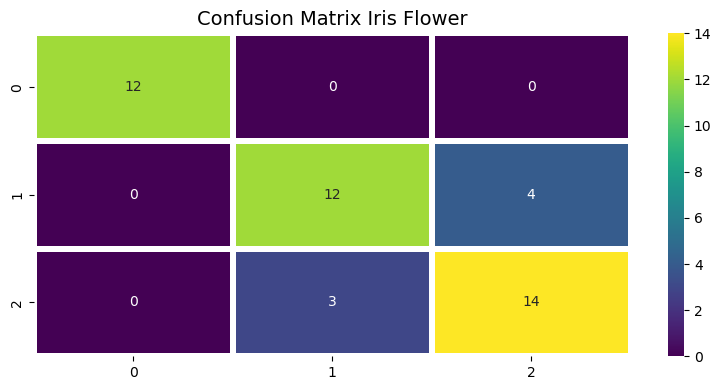

In [19]:
# Barplot - Countplot
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(conf_C45, annot=True,  cmap="viridis", linewidths=3)
# Set Label
ax.set_title("Confusion Matrix Iris Flower", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(False)

# Show Plot
plt.tight_layout()
plt.show()

In [20]:
# Evaluation Models - Classification Report
print(classification_report(y_true=testY, y_pred=result_C45))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.75      0.77        16
   virginica       0.78      0.82      0.80        17

    accuracy                           0.84        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.84      0.84      0.84        45

